In [1]:
import keras
from keras.datasets import mnist
import numpy as np

Using TensorFlow backend.


In [2]:
(x_train_origin, y_train_origin),(x_test_origin, y_test_origin) = mnist.load_data()

In [3]:
# if digit == 1, then label = 1, else label = 0
func = lambda x: 1 if x == 1 else 0
#y_train = list(map(func, y_train_origin))
#y_test = list(map(func, y_test_origin))

In [4]:
x_train = x_train_origin.reshape((60000, 28 * 28))
x_test = x_test_origin.reshape((10000, 28 * 28))

In [5]:
y_train = np.array([func(y) for y in y_train_origin])
y_test = np.array([func(y) for y in y_test_origin])

In [6]:
x_train = x_train.reshape(x_train.shape[0], -1).T
x_test = x_test.reshape(x_test.shape[0], -1).T

y_train = y_train.reshape(1,y_train.shape[0])
y_test = y_test.reshape(1,y_test.shape[0])

In [7]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [8]:
def sigmoid(z):
    
    s = 1.0/(1.0 + np.exp(-z))
    
    return s

In [9]:
def initialize_params_with_zeros(dim):
    
    w = np.zeros((dim,1))
    b = 0
    
    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [14]:
def propagate(w, b, X, Y):
    
    m = X.shape[1]

    A = sigmoid(np.dot(w.T, X) + b)                                       
    cost = -1./m * np.sum(Y * np.log(A) + (1 - Y) * np.log(1-A)) 

    dw = (1/m)*np.dot(X,(A-Y).T)
    db = 1/m*np.sum(A-Y)

    assert(dw.shape == w.shape)
    assert(db.dtype == float)

    cost = np.squeeze(cost)
    assert(cost.shape == ())
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [37]:
def optimize(w, b, X, Y, num_iters, batch_size, learning_rate, print_cost):
   
    costs = []
    m = X.shape[1]
    for i in range(num_iters):
        #cost_batch is used to collect the cost during one iteration over different batches
        cost_batch = []
        #stochastic gradient descent
        shuffled_indices = np.random.permutation(m)
        X_shuffled = X[:,shuffled_indices]
        y_shuffled = Y[:,shuffled_indices]
        #mini-batch
        for j in range(0, m, batch_size):
            x_batch = X_shuffled[:,j:j+batch_size]
            y_batch = y_shuffled[:,j:j+batch_size]
            grads, cost = propagate(w, b, x_batch, y_batch)
            dw = grads["dw"]
            db = grads["db"]
            w = w - learning_rate *  dw    
            b = b - learning_rate *  db
            cost_batch.append(cost)
            # the cost of one iteration is the average number over batches
            cost = np.mean(cost_batch)
        costs.append(cost)
        
        if print_cost:
            print ("Cost after iteration %i: %f" % (i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs


In [38]:
def predict(w, b, X):
   
    m = X.shape[1]
    Y_pred = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    A = sigmoid(np.dot(w.T, X) + b)
    

    for i in range(A.shape[1]):
        if A[0][i] <= 0.5:
            Y_pred[0, i] = 0
        else:
            Y_pred[0, i] = 1
                
    assert(Y_pred.shape == (1, m))
    
    return Y_pred

In [39]:
def model(x_train, y_train, x_test, y_test, num_iters=20, batch_size = 5, learning_rate=0.5, print_cost=False):
    
    w, b = initialize_params_with_zeros(x_train.shape[0])                          

    parameters, grads, costs = optimize(w, b, x_train, y_train, num_iters, batch_size, learning_rate, print_cost)     

    w = parameters["w"]
    b = parameters["b"]
    

    Y_pred_test = predict(w, b, x_test)
    Y_pred_train = predict(w, b, x_train)

    print("")
    
    train_accuracy =  100 - np.mean(np.abs(Y_pred_train - y_train)) * 100
    test_accuracy = 100 - np.mean(np.abs(Y_pred_test - y_test)) * 100
    
    print("train accuracy: {} %".format(train_accuracy))
    print("test accuracy: {} %".format(test_accuracy))
    repr('train accuracy')
    
    d = {"costs": costs,
         "Y_pred_test": Y_pred_test, 
         "Y_pred_train" : Y_pred_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iters": num_iters}
    
    return d, train_accuracy, test_accuracy

In [40]:
d = model(x_train, y_train, x_test, y_test, num_iters=10, batch_size=1000, learning_rate=0.01, print_cost=True)

Cost after iteration 0: 0.356703
Cost after iteration 1: 0.232189
Cost after iteration 2: 0.185450
Cost after iteration 3: 0.158355
Cost after iteration 4: 0.140909
Cost after iteration 5: 0.128692
Cost after iteration 6: 0.119598
Cost after iteration 7: 0.112513
Cost after iteration 8: 0.106799
Cost after iteration 9: 0.102070

train accuracy: 97.74166666666666 %
test accuracy: 97.76 %


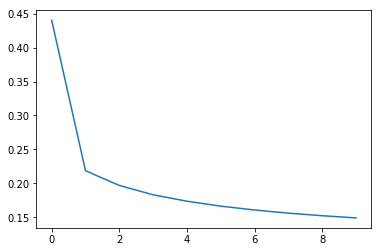

In [44]:
import matplotlib.pyplot as plt

# I want to show the cost of training over different iterations
plt.plot(d['costs'])
plt.show()

In [42]:
# the accuracy for number 0 to number 9

for i in range(10):
# if digit == i, then label = 1, else label = 0
    func = lambda x: 1 if x == i else 0
    y_train = np.array([func(y) for y in y_train_origin])
    y_test = np.array([func(y) for y in y_test_origin])
    
    y_train = y_train.reshape(1,y_train.shape[0])
    y_test = y_test.reshape(1,y_test.shape[0])
    
    print("\n", "the accuracy of number {}".format(i))
    
    d, train, test = model(x_train, y_train, x_test, y_test, num_iters=10, batch_size=10000, learning_rate=0.5, print_cost=False)
    


 the accuracy of number 0

train accuracy: 98.55833333333334 %
test accuracy: 98.84 %

 the accuracy of number 1

train accuracy: 98.65 %
test accuracy: 98.85 %

 the accuracy of number 2

train accuracy: 96.92333333333333 %
test accuracy: 96.96 %

 the accuracy of number 3

train accuracy: 96.42166666666667 %
test accuracy: 96.73 %

 the accuracy of number 4

train accuracy: 97.415 %
test accuracy: 97.23 %

 the accuracy of number 5

train accuracy: 95.335 %
test accuracy: 95.65 %

 the accuracy of number 6

train accuracy: 98.05833333333334 %
test accuracy: 97.97 %

 the accuracy of number 7

train accuracy: 97.86 %
test accuracy: 97.9 %

 the accuracy of number 8

train accuracy: 94.32166666666667 %
test accuracy: 94.16 %

 the accuracy of number 9

train accuracy: 95.01166666666667 %
test accuracy: 95.2 %
